<a href="https://colab.research.google.com/github/Gbemi123/Horoscopes-with-Tensorflow/blob/main/Horoscopes_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

{}

In [ ]:
 ! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
 ! kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.8/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!kaggle kernels output anasofiauzsoy/writing-horoscopes-with-tensorflow-2 -p /path/to/dest

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.8/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
! kaggle competitions download -c'/kaggle/input/horoscopes/horoscopes.csv'

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.8/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


# Import libraries

In [ ]:
import numpy as np 
import torch  
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


for dirname, _, filenames in os.walk('https://raw.githubusercontent.com/dsnam/markovscope/master/data/horoscopes.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# Loading Data

In [ ]:
# url = 'https://raw.githubusercontent.com/dsnam/markovscope/master/data/horoscopes.csv'
# df1 = pd.read_csv(url)

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/dsnam/markovscope/master/data/horoscopes.csv', error_bad_lines=False, 
                   sep= '|', header= None, names= ['horoscope', 'date', 'star sign'], 
                   index_col= 0)

data.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,horoscope,date,star sign
0,You’re not the sort to play safe and even if y...,12-01-2013,aries
1,There is no such thing as something for nothin...,12-02-2013,aries
2,As the new moon falls in one of the more adven...,12-03-2013,aries
3,You will hear something amazing today but can ...,12-04-2013,aries
4,A friend or colleague you have not seen for a ...,12-05-2013,aries


# Creating word cloud to see which words are most common

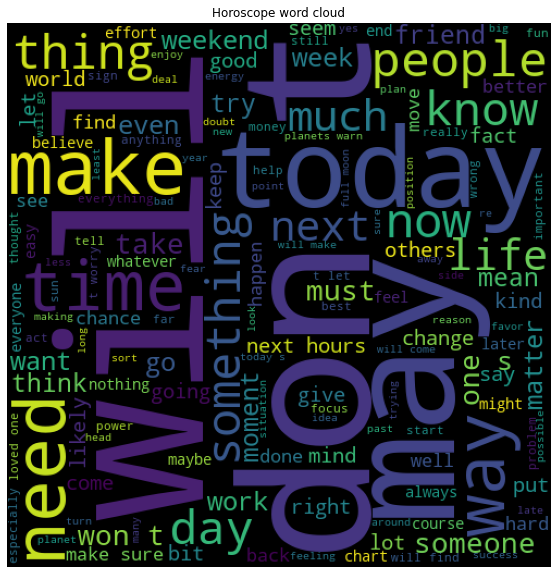

In [ ]:
words =''
stopwords = set(STOPWORDS)

for txt in data.horoscope.values:
  text = str(txt)
  text = text.split()
  # changing all words to lower case
  words += ' '.join([(i.lower()+' ') for i in text])

# creating word cloud
## cloud size

cloud = WordCloud(width= 500, height = 500, background_color='black',
                  stopwords= stopwords, min_font_size= 10)
cloud.generate(words)

plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(cloud)
plt.title('Horoscope word cloud')
plt.axis('off')

plt.show()



# Preparing Input

In [ ]:
# cleaning text, make everything lowercase and remove punctation
import string

def clean_text(text):
  words= str(text).split()
  words = ' '.join([(i.lower()+' ') for i in words])
  words = words.translate(words.maketrans('', '', string.punctuation))

  return words

data['horoscope'] = data['horoscope'].apply(clean_text)


In [ ]:
data

,horoscope,date,star sign
0,you’re not the sort to play safe and e...,12-01-2013,aries
1,there is no such thing as something for...,12-02-2013,aries
2,as the new moon falls in one of the m...,12-03-2013,aries
3,you will hear something amazing today bu...,12-04-2013,aries
4,a friend or colleague you have not seen...,12-05-2013,aries
...,...,...,...
1076,you may not like it when things change ...,12-08-2016,pisces
1077,if a friend or colleague gives you a t...,12-09-2016,pisces
1078,the sun joins forces with saturn in the...,12-10-2016,pisces
1079,why are you so worried pisces what coul...,12-11-2016,pisces


# Tokenizing the text to turn it into array of numbers 

In [ ]:
# use Keras processing layers to tokenize the text

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


vocab_size =15000
max_length= 50
oov_tok ='<OOV>'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(data.horoscope.values)
word_index =tokenizer.word_index


In [ ]:
type(word_index)

dict

In [ ]:
get_word = {v:k for k, v in word_index.items()} 
get_word

{1: '<OOV>',
 2: 'you',
 3: 'to',
 4: 'the',
 5: 'and',
 6: 'your',
 7: 'of',
 8: 'be',
 9: 'a',
 10: 'it',
 11: 'will',
 12: 'is',
 13: 'that',
 14: 'in',
 15: 'are',
 16: 'but',
 17: 'have',
 18: 'if',
 19: 'not',
 20: 'what',
 21: 'for',
 22: 'on',
 23: 'don’t',
 24: 'with',
 25: 'do',
 26: 'may',
 27: 'so',
 28: 'make',
 29: 'get',
 30: 'today',
 31: 'they',
 32: 'as',
 33: 'over',
 34: '–',
 35: 'more',
 36: 'them',
 37: 'at',
 38: 'can',
 39: 'there',
 40: 'about',
 41: 'yourself',
 42: 'people',
 43: 'or',
 44: 'things',
 45: 'no',
 46: 'next',
 47: 'time',
 48: 'something',
 49: 'too',
 50: 'this',
 51: 'out',
 52: 'good',
 53: 'need',
 54: 'all',
 55: 'way',
 56: 'up',
 57: 'take',
 58: 'now',
 59: 'some',
 60: 'know',
 61: 'one',
 62: 'because',
 63: 'life',
 64: 'go',
 65: 'few',
 66: 'must',
 67: 'let',
 68: 'who',
 69: 'days',
 70: 'others',
 71: 'much',
 72: 'could',
 73: 'it’s',
 74: 'most',
 75: 'even',
 76: 'someone',
 77: 'work',
 78: 'just',
 79: 'should',
 80: 'won’

In [ ]:
# keep track of different sequnces of words in the text 
# to reduce processing time we do once every 100 words

sequences =tokenizer.texts_to_sequences(data.horoscope.values[::100])

n_gram_seq = []

for seq in sequences:
  for i, j in enumerate(seq):

    if i< (len(seq) - 10):
      s = seq[i:i + 10]

      for k, l in enumerate(s):
        n_gram_seq.append (s[:k+1])

n_gram_seq = np.array(n_gram_seq)
n_gram_seq

<ipython-input-10-a4d6ca1539e8>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  n_gram_seq = np.array(n_gram_seq)


array([list([249]), list([249, 19]), list([249, 19, 4]), ...,
       list([56, 6, 692, 5, 23, 67, 706, 2040]),
       list([56, 6, 692, 5, 23, 67, 706, 2040, 330]),
       list([56, 6, 692, 5, 23, 67, 706, 2040, 330, 2])], dtype=object)

In [ ]:
max_len = max ([len(i) for i in n_gram_seq])

# **Padding the sequneces**

## For any sequence, the label is the last word and the input is all the words before the last. e.g. "I love machine learning" the label is "learning" and the input is " i love machine"

## We do this so the model learns the lead phrases and predicts what comes after.

In [ ]:
padded = pad_sequences(n_gram_seq, maxlen=max_len, padding= 'pre')

input_seq, labels = padded[:,:-1], padded[:,-1]
labels=tf.keras.utils.to_categorical(labels,num_classes= vocab_size)

# Time to create the model and train it 

In [ ]:
from tensorflow.python.framework.func_graph import flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, LSTM, Embedding, Flatten


In [ ]:
def create_model():
  model= Sequential()

  model.add(Embedding(vocab_size, 64, input_length = max_len-1))
  model.add(Bidirectional(LSTM(20)))
  model.add(Dense(vocab_size, activation='softmax'))
  model.compile(loss= 'categorical_crossentropy', optimizer= 'adam', 
                metrics= ['accuracy'])
  
  
  
  
  return model
  

In [ ]:
use_tpu =False 

if use_tpu:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
  tf.config.experimental_connect_to_cluster(tpu)
  tf.tpu.experimental.initialize_tpu_system(tpu)
  strategy = tf.distribute.experimental.TPUStrategy(tpu)

  # create model

  with strategy.scope():
    model =create_model()

else:
  model = create_model()

model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 9, 64)             960000    
                                                                 
 bidirectional_6 (Bidirectio  (None, 40)               13600     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 15000)             615000    
                                                                 
Total params: 1,588,600
Trainable params: 1,588,600
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit()

In [ ]:
type(input_seq)

numpy.ndarray

In [ ]:
history = model.fit(input_seq, labels, epochs=100, verbose= 1)

Epoch 1/100
1425/1425 [==============================] - 64s 40ms/step - loss: 5.7536 - accuracy: 0.0639
Epoch 2/100
1425/1425 [==============================] - 58s 41ms/step - loss: 5.2433 - accuracy: 0.0723
Epoch 3/100
1425/1425 [==============================] - 55s 39ms/step - loss: 4.9551 - accuracy: 0.0927
Epoch 4/100
1425/1425 [==============================] - 56s 40ms/step - loss: 4.6481 - accuracy: 0.1241
Epoch 5/100
1425/1425 [==============================] - 54s 38ms/step - loss: 4.3392 - accuracy: 0.1579
Epoch 6/100
1425/1425 [==============================] - 55s 38ms/step - loss: 4.0793 - accuracy: 0.1846
Epoch 7/100
1425/1425 [==============================] - 53s 37ms/step - loss: 3.8546 - accuracy: 0.2155
Epoch 8/100
1425/1425 [==============================] - 52s 37ms/step - loss: 3.6512 - accuracy: 0.2445
Epoch 9/100
1425/1425 [==============================] - 54s 38ms/step - loss: 3.4648 - accuracy: 0.2743
Epoch 10/100
1425/1425 [==============================]

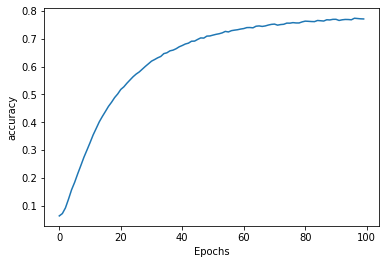

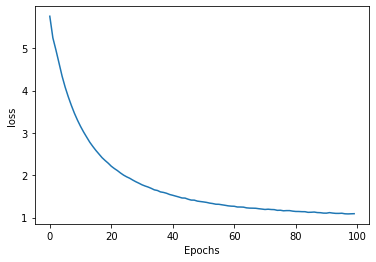

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
avg_length = int(len(words.split())/len(data))  ## average length of horoscope

In [ ]:
def write_horoscope(seed_text):
    for _ in range(avg_length):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_len-1, padding='pre')
        pred_probs = model.predict(token_list)
        predicted = np.random.choice(np.linspace(0, vocab_size - 1, vocab_size), p = pred_probs[0])
        if predicted == 1: ## if it's OOV, pick the next most likely one.
            pred_probs[0][1] = 0
            predicted = np.argmax(pred_probs)
        output_word = get_word[predicted]
        seed_text += " " + output_word
    print(seed_text)

In [ ]:
write_horoscope('You have')

1/1 [==============================] - 0s 20ms/step
You have to admit you learned some valuable lessons now you will get the chance to apply what you have learned in a much more favorable atmosphere have too focus on the basics and don’t read into a minute perfect sign terrible enough to respond the


In [ ]:
write_horoscope('You will')

1/1 [==============================] - 0s 23ms/step
You will your home life more enjoyable one way is to put work matters to the back of your mind and focus on family to the exclusion of everything else making a profit is okay but making loved ones happy way okay but all things that


In [ ]:
write_horoscope('today will')

1/1 [==============================] - 0s 35ms/step
today will you care of course not on don’t give you the end quite soon be going to get a highly productive time that comes colleagues expect you to knuckle down and work your way through whatever chores they’ve lined up for you they are going


## saving model

In [ ]:
# model.save('/content/drive/MyDrive/Colab Notebooks/PERSONAL PROJECTS/horoscope')

## loading model

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/PERSONAL PROJECTS/horoscope')

# Check its architecture
new_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 9, 64)             960000    
                                                                 
 bidirectional_6 (Bidirectio  (None, 40)               13600     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 15000)             615000    
                                                                 
Total params: 1,588,600
Trainable params: 1,588,600
Non-trainable params: 0
_________________________________________________________________
